In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import os
from scipy.linalg import circulant
from numpy import linalg as LA
import preprocess as pr
from keras.preprocessing import sequence
import keras
from keras.models import Sequential,Model
from keras.layers import Dense,Input,Conv1D,MaxPooling1D,Flatten,LSTM,Dropout,BatchNormalization,Activation,Concatenate
import hickle as hkl
from keras.preprocessing import sequence
import re
from sklearn import preprocessing

Using TensorFlow backend.


In [3]:
os.chdir("/Polycarbon/hand Motion Clasification")

# build model function

In [4]:
def build_model(feature_length,window_length):
    input_signal = Input(shape=(feature_length,window_length),name="input_signal")
    x = Conv1D(filters=32, kernel_size=3,activation='relu', padding='same')(input_signal)
    #x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=16, kernel_size=200,activation='relu', padding='same')(x)
    #x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=8, kernel_size=200,activation='relu', padding='same')(x)
    #x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Flatten()(x)
   # x = Dropout(0.5)(x)
    x = Dense(output_dim = 80, init = 'uniform', activation = 'relu')(x)
    dense_out = Dense(17, activation="sigmoid" ,name ="output_Dense")(x)
    
    model=Model(inputs=[input_signal], outputs=[dense_out])
        
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def build_model2(window_length,feature_length):
    input_signal = Input(shape=(window_length,feature_length),name="input_signal")
    x = Conv1D(filters=32, kernel_size=3,activation='relu', padding='same')(input_signal)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=16, kernel_size=200,activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Conv1D(filters=8, kernel_size=200,activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)

    x = Flatten()(x)
   # x = Dropout(0.5)(x)
    x = Dense(output_dim = 80, init = 'uniform', activation = 'relu')(x)
    dense_out = Dense(17, activation="sigmoid" ,name ="output_Dense")(x)
    
    model=Model(inputs=[input_signal], outputs=[dense_out])
        
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Load Data

In [26]:
x=[]
y=[]
for sample_file in os.listdir("full data/")[1:40]:
    d= hkl.load("full data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)
    
y=np.array(y)
y[y=="14left"]="14l"
y[y=="15left"]="15l"
y[y=="14right"]="14r"
y[y=="15right"]="15r"
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

success : Amnoey.hkl
success : amnuay.hkl
success : ampai2.hkl
success : angkana.hkl
success : Aphinop.hkl
success : Aueporn.hkl
success : Bancha.hkl
success : Benjarat.hkl
success : Boonching.hkl
success : Buntean.hkl
success : Buntra.hkl
success : Charuves_Krasaerot.hkl
success : Chatri.hkl
success : Donsatid.hkl
success : Duangporn.hkl
success : Duenpen.hkl
success : dusid.hkl
success : Gulthida.hkl
success : Jamroen.hkl
success : Jamroen_Murangkerd.hkl
success : Jinda_Jaichuphan.hkl
success : Jiratchaya.hkl
success : Jittana Jaroenrak.hkl
success : Kamon.hkl
success : Karnda.hkl
success : Keawta.hkl
success : khanittha.hkl
success : kobkeaw.hkl
success : Ladawan.hkl
success : lamphueng.hkl
success : lamyong.hkl
success : laong krue.hkl
success : Lumyong.hkl
success : Mayuree.hkl
success : Mayuree2.hkl
success : Mink.hkl
success : Mongkhon.hkl
success : Napas.hkl
success : Narin.hkl


In [21]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
X =np.concatenate((XL[:,16:], XR[:,16:]), axis=1)

In [22]:
from sklearn.preprocessing import normalize
y_e = np.array(y_e)
for gt in range(encoder.classes_.size):
    for ch in range(len(X[0])):      
        X[y_e==gt][:,ch] = normalize(X[y_e==gt][:,ch])

In [17]:
model=build_model2(X.shape[1],X.shape[2])  
model.fit(X, pd.get_dummies(y_e), batch_size = 500, nb_epoch = 100)

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
5750/5750 [==============================] - 2s 385us/step - loss: 2.7987 - acc: 0.1148
Epoch 2/100
5750/5750 [==============================] - 1s 199us/step - loss: 2.6870 - acc: 0.2080
Epoch 3/100
5750/5750 [==============================] - 1s 198us/step - loss: 2.5282 - acc: 0.2685
Epoch 4/100
5750/5750 [==============================] - 1s 199us/step - loss: 2.2801 - acc: 0.3666 0s - loss: 2.3550 - acc: 0 - ETA: 0s - loss: 2.2991 - acc: 0.36
Epoch 5/100
5750/5750 [==============================] - 1s 200us/step - loss: 1.9164 - acc: 0.4943
Epoch 6/100
5750/5750 [==============================] - 1s 199us/step - loss: 1.4962 - acc: 0.6007
Epoch 7/100
5750/5750 [==============================] - 1s 199us/step - loss: 1.1280 - acc: 0.7125
Epoch 8/100
5750/5750 [==============================] - 1s 198us/step - loss: 0.8444 - acc: 0.7833 0s - loss: 0.9218 - acc: 0.756 - ETA: 0s - loss: 0.9003 - ac
Epoch 9/100
5750/5750 [==============================] - 1s 203us/step - lo

5750/5750 [==============================] - 1s 200us/step - loss: 0.0012 - acc: 1.0000 0s - loss: 0.0011 - acc: 
Epoch 76/100
5750/5750 [==============================] - 1s 201us/step - loss: 0.0012 - acc: 1.0000
Epoch 77/100
5750/5750 [==============================] - 1s 201us/step - loss: 0.0011 - acc: 1.0000
Epoch 78/100
5750/5750 [==============================] - 1s 204us/step - loss: 0.0011 - acc: 1.0000
Epoch 79/100
5750/5750 [==============================] - 1s 201us/step - loss: 0.0010 - acc: 1.0000
Epoch 80/100
5750/5750 [==============================] - 1s 202us/step - loss: 0.0011 - acc: 1.0000
Epoch 81/100
5750/5750 [==============================] - 1s 199us/step - loss: 0.0029 - acc: 0.9997
Epoch 82/100
5750/5750 [==============================] - 1s 201us/step - loss: 0.0104 - acc: 0.9974
Epoch 83/100
5750/5750 [==============================] - 1s 200us/step - loss: 0.1818 - acc: 0.9478
Epoch 84/100
5750/5750 [==============================] - 1s 201us/step - loss

# ผลของโมเดล1


In [12]:
scores = model.evaluate([X], pd.get_dummies(y_e))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1493/1493 [==============================] - 0s 267us/step

acc: 35.16%


1493/1493 [==============================] - 1s 440us/step

acc: 35.16%
Confusion matrix, without normalization
[[52  9  9  0  0  5  2  8  0  0  3  4  0  0  4  2  1]
 [ 3 21  7 12  3  4  1  1  0  1 16 13  1  0  1  0  1]
 [ 1  3 37  1  6  1  3  2  3  1  7  5 13  3  1  1  1]
 [11 13  4 22  4  2  1  6  1  6  1 10  1  1  0  2  0]
 [ 1  0 17  5 19 16  4  4  0  1  1  1  7  1  5  1  2]
 [ 1  9  6  2  2 30  5  8  8  1  0  1  4  3  0  3  4]
 [10  3  1  1  2  7 33  3 13  4  0  3  0  6  1  0  0]
 [ 0  8  0  0  3  7  0 47  0 16  0  2  0  0  0  1  0]
 [ 0  0  0  1  0 15  8  3 48  1  1  5  0  0  0  2  0]
 [ 3  3  1 23  3  0  3  9  4 21  8  5  0  0  6  0  1]
 [ 0  8 11 12  0  6  2  2  1  2 17  1  2  1 22  0  0]
 [11  1  2  4  0 12  8  1  2  3  6 31  4  1  9  0  0]
 [ 4  6  3  0  4  2  1  2  2  0  1  4 52  1  3  6  1]
 [16  1  5  0  5 17  5  3  1  0  6  2  2 15  1 10  0]
 [ 3 15 10 10  1  0  0  2  3  0 14  9  5  0 15  2  0]
 [23  3 10  0  3 11  2  0  0  0  0  3  6 11  0 10  0]
 [ 0  0  2  0  0  8  1  

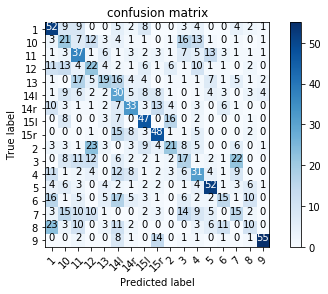

Normalized confusion matrix
[[0.53 0.09 0.09 0.   0.   0.05 0.02 0.08 0.   0.   0.03 0.04 0.   0.
  0.04 0.02 0.01]
 [0.04 0.25 0.08 0.14 0.04 0.05 0.01 0.01 0.   0.01 0.19 0.15 0.01 0.
  0.01 0.   0.01]
 [0.01 0.03 0.42 0.01 0.07 0.01 0.03 0.02 0.03 0.01 0.08 0.06 0.15 0.03
  0.01 0.01 0.01]
 [0.13 0.15 0.05 0.26 0.05 0.02 0.01 0.07 0.01 0.07 0.01 0.12 0.01 0.01
  0.   0.02 0.  ]
 [0.01 0.   0.2  0.06 0.22 0.19 0.05 0.05 0.   0.01 0.01 0.01 0.08 0.01
  0.06 0.01 0.02]
 [0.01 0.1  0.07 0.02 0.02 0.34 0.06 0.09 0.09 0.01 0.   0.01 0.05 0.03
  0.   0.03 0.05]
 [0.11 0.03 0.01 0.01 0.02 0.08 0.38 0.03 0.15 0.05 0.   0.03 0.   0.07
  0.01 0.   0.  ]
 [0.   0.1  0.   0.   0.04 0.08 0.   0.56 0.   0.19 0.   0.02 0.   0.
  0.   0.01 0.  ]
 [0.   0.   0.   0.01 0.   0.18 0.1  0.04 0.57 0.01 0.01 0.06 0.   0.
  0.   0.02 0.  ]
 [0.03 0.03 0.01 0.26 0.03 0.   0.03 0.1  0.04 0.23 0.09 0.06 0.   0.
  0.07 0.   0.01]
 [0.   0.09 0.13 0.14 0.   0.07 0.02 0.02 0.01 0.02 0.2  0.01 0.02 0.01
  0.25 0. 

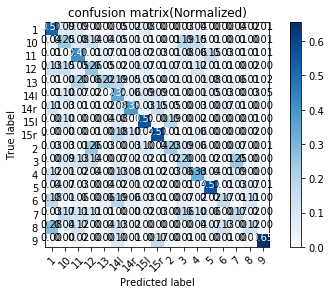

In [10]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

scores = model.evaluate([X], pd.get_dummies(y_e))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
prd = get_predict(model,X)
pr.confuse_matrix_plot(y_e,prd,encoder.classes_,title="confusion matrix")

# ผลของโมเดล2

In [25]:
scores = model.evaluate([X], pd.get_dummies(y_e))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1493/1493 [==============================] - 0s 271us/step

acc: 33.82%


In [4]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

scores = model.evaluate([X], pd.get_dummies(y_e))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
prd = get_predict(model,X)
pr.confuse_matrix_plot(y_e,prd,encoder.classes_,title="confusion matrix")

# ผลของโมเดล3

In [23]:
scores = model.evaluate([X], pd.get_dummies(y_e))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1493/1493 [==============================] - 0s 268us/step

acc: 33.82%


1493/1493 [==============================] - 0s 256us/step

acc: 33.82%
Confusion matrix, without normalization
[[49  3 18  0  0  0  3  1  0  3  9  0  1  0  2  6  4]
 [ 5 12 14  7  0  3  0  4  7  0 10  4  1  4 12  2  0]
 [10  0 19  0  4  0  7  3  1  1  5  7 25  0  2  3  2]
 [ 3  1  9 18  0  3  3  9  3  5  8  4  0  2 12  3  2]
 [ 4  0  8 14 19  1  7  0  4  2  2  1  8  3  7  5  0]
 [ 6  0  3  3  0 11 11 30  8  0  0  1  0  2  1  3  8]
 [10  1  0  0  1 14 41  1  0  0  1  3  4  0 10  0  1]
 [ 0  2  1  0  0  3  2 47  0  8 10  0  0  2  2  0  7]
 [ 2  2  0  3  1 12  7  0 45  1  0  7  0  1  0  0  3]
 [ 0  6  6 24  4  2  2  1  0 14  1  2  1  1 20  5  1]
 [ 1 10 10  4  0  1  8  1  0  4 29  1  0  3 12  2  1]
 [16  0  2 12  0 10  5  1  1  0  6 28  1  6  6  1  0]
 [ 0  1  4  0  3  6  6  1  1  2  2  3 51  1  3  7  1]
 [12  7  1  0  0 12 11  0  0  0  4  5  2 11  2 20  2]
 [ 5  0 10  3  0  1  2  1  0  5 27  1  9  1 24  0  0]
 [10  1  9  2  1  8  1  1  0  0  0  3  0 17  0 29  0]
 [ 2  0  2  0  0  2  4  

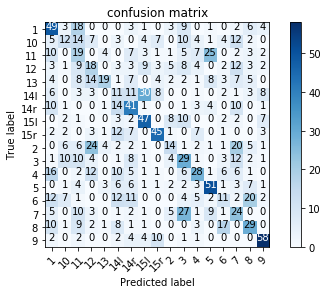

Normalized confusion matrix
[[0.49 0.03 0.18 0.   0.   0.   0.03 0.01 0.   0.03 0.09 0.   0.01 0.
  0.02 0.06 0.04]
 [0.06 0.14 0.16 0.08 0.   0.04 0.   0.05 0.08 0.   0.12 0.05 0.01 0.05
  0.14 0.02 0.  ]
 [0.11 0.   0.21 0.   0.04 0.   0.08 0.03 0.01 0.01 0.06 0.08 0.28 0.
  0.02 0.03 0.02]
 [0.04 0.01 0.11 0.21 0.   0.04 0.04 0.11 0.04 0.06 0.09 0.05 0.   0.02
  0.14 0.04 0.02]
 [0.05 0.   0.09 0.16 0.22 0.01 0.08 0.   0.05 0.02 0.02 0.01 0.09 0.04
  0.08 0.06 0.  ]
 [0.07 0.   0.03 0.03 0.   0.13 0.13 0.34 0.09 0.   0.   0.01 0.   0.02
  0.01 0.03 0.09]
 [0.11 0.01 0.   0.   0.01 0.16 0.47 0.01 0.   0.   0.01 0.03 0.05 0.
  0.11 0.   0.01]
 [0.   0.02 0.01 0.   0.   0.04 0.02 0.56 0.   0.1  0.12 0.   0.   0.02
  0.02 0.   0.08]
 [0.02 0.02 0.   0.04 0.01 0.14 0.08 0.   0.54 0.01 0.   0.08 0.   0.01
  0.   0.   0.04]
 [0.   0.07 0.07 0.27 0.04 0.02 0.02 0.01 0.   0.16 0.01 0.02 0.01 0.01
  0.22 0.06 0.01]
 [0.01 0.11 0.11 0.05 0.   0.01 0.09 0.01 0.   0.05 0.33 0.01 0.   0.03
  0.14

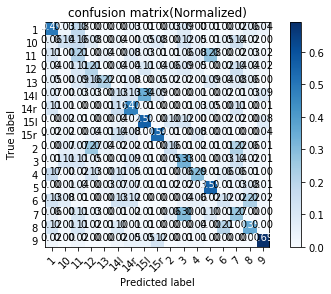

In [24]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

scores = model.evaluate([X], pd.get_dummies(y_e))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
prd = get_predict(model,X)
pr.confuse_matrix_plot(y_e,prd,encoder.classes_,title="confusion matrix")

In [5]:
from sklearn.preprocessing import normalize
y_e = np.array(y_e)
for gt in range(encoder.classes_.size):
    for ch in range(len(X[0])):      
        X[y_e==gt][:,ch] = normalize(X[y_e==gt][:,ch])

In [6]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split( X,y_e,test_size=0.2,stratify=y_e)

model=build_model2(X.shape[1],X.shape[2])  
model.fit(X, pd.get_dummies(y_e), batch_size = 500, nb_epoch = 100)

NameError: name 'build_model2' is not defined

In [14]:
print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results20.std()*100))

[0.91147542 0.95379537 0.94019932 0.95016611 0.92026579 0.91333336
 0.91333336 0.95254236 0.95238096 0.89690721]
Baseline: 93.04% (2.04%)


In [18]:
print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results20.std()*100))

[0.9213115  0.95709568 0.9601329  0.95348835 0.76079732 0.94
 0.93000001 0.92542374 0.93537414 0.91408932]
Baseline: 91.98% (5.50%)


# 30 sample

In [7]:
for sample_file in os.listdir("Trimed data/")[20:30]:
    d= hkl.load("Trimed data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)
    
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

KeyboardInterrupt: 

In [ ]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
X =np.concatenate((XL[:,16:], XR[:,16:]), axis=1)

In [ ]:
skf.get_n_splits(X, y_e)
results30 = cross_val_score(estimator, X, y_e, cv=skf)

In [ ]:
print(results30)
print("Baseline: %.2f%% (%.2f%%)" % (results30.mean()*100, results30.std()*100))

# 40 sample

In [ ]:
for sample_file in os.listdir("Trimed data/")[30:40]:
    d= hkl.load("Trimed data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)
    
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

In [ ]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
X =np.concatenate((XL[:,16:], XR[:,16:]), axis=1)

In [ ]:
skf.get_n_splits(X, y_e)
results40 = cross_val_score(estimator, X, y_e, cv=skf)

In [ ]:
print(results40)
print("Baseline: %.2f%% (%.2f%%)" % (results40.mean()*100, results40.std()*100))

# 50 sample

In [19]:
x=[]
y=[]
for sample_file in os.listdir("Trimed data/")[:50]:
    d= hkl.load("Trimed data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)

y=np.array(y)
y[y=="14left"]="14l"
y[y=="15left"]="15l"
y[y=="14right"]="14r"
y[y=="15right"]="15r"
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

success : Amnoey.hkl
success : amnuay.hkl
success : ampai2.hkl
success : angkana.hkl
success : Aphinop.hkl
success : Aueporn.hkl
success : Bancha.hkl
success : Benjarat.hkl
success : Boonching.hkl
success : Buntean.hkl
success : Buntra.hkl
success : Charuves_Krasaerot.hkl
success : Chatri.hkl
success : Donsatid.hkl
success : Duangporn.hkl
success : Duenpen.hkl
success : dusid.hkl
success : Jamroen.hkl
success : Jamroen_Murangkerd.hkl
success : Jinda_Jaichuphan.hkl
success : Jiratchaya.hkl
success : Jittana Jaroenrak.hkl
success : Kamon.hkl
success : Karnda.hkl
success : Keawta.hkl
success : khanittha.hkl
success : kobkeaw.hkl
success : Ladawan.hkl
success : lamphueng.hkl
success : lamyong.hkl
success : laong krue.hkl
success : Lumyong.hkl
success : Mayuree.hkl
success : Mayuree2.hkl
success : Mink.hkl
success : Mongkhon.hkl
success : Napas.hkl
success : Narin.hkl
success : Narin_Prang.hkl
success : narumon.hkl
success : Nittaya.hkl
success : onsa.hkl
success : Oranut.hkl
success : Paga

In [20]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
X =np.concatenate((XL[:,16:], XR[:,16:]), axis=1)
del(XL,XR)

In [21]:
from sklearn.preprocessing import normalize
y_e = np.array(y_e)
for gt in range(encoder.classes_.size):
    for ch in range(len(X[0])):      
        X[y_e==gt][:,ch] = normalize(X[y_e==gt][:,ch])

In [22]:
y=np.array(y)
y[y=="14left"]="14l"
y[y=="15left"]="15l"
y[y=="14right"]="14r"
y[y=="15right"]="15r"
encoder.fit(y)
y_e  = encoder.transform(y)
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

In [25]:
estimator = KerasClassifier(build_fn=build_model2,feature_length=X.shape[2]  ,window_length=X.shape[1],epochs=100, batch_size=500, verbose=1)
skf.get_n_splits(X, y_e)
results50 = cross_val_score(estimator, X, y_e, cv=skf)

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`


Epoch 1/100
6628/6628 [==============================] - 7s 985us/step - loss: 2.7894 - acc: 0.1257
Epoch 2/100
6628/6628 [==============================] - 1s 209us/step - loss: 2.6452 - acc: 0.2204
Epoch 3/100
6628/6628 [==============================] - 1s 206us/step - loss: 2.4451 - acc: 0.2826
Epoch 4/100
6628/6628 [==============================] - 1s 209us/step - loss: 2.1731 - acc: 0.3603
Epoch 5/100
6628/6628 [==============================] - 1s 208us/step - loss: 1.8229 - acc: 0.4740
Epoch 6/100
6628/6628 [==============================] - 1s 207us/step - loss: 1.4889 - acc: 0.5780
Epoch 7/100
6628/6628 [==============================] - 1s 206us/step - loss: 1.1951 - acc: 0.6539 0s - loss: 1.1973 - acc: 0.654
Epoch 8/100
6628/6628 [==============================] - 1s 207us/step - loss: 0.9210 - acc: 0.7399 0s - loss: 0.9455 - acc: 0.
Epoch 9/100
6628/6628 [==============================] - 1s 208us/step - loss: 0.7187 - acc: 0.8084
Epoch 10/100
6628/6628 [=================

6629/6629 [==============================] - 1s 207us/step - loss: 0.1817 - acc: 0.9452
Epoch 59/100
6629/6629 [==============================] - 1s 209us/step - loss: 0.1857 - acc: 0.9403
Epoch 60/100
6629/6629 [==============================] - 1s 211us/step - loss: 0.1477 - acc: 0.9526
Epoch 61/100
6629/6629 [==============================] - 1s 207us/step - loss: 0.1092 - acc: 0.9671
Epoch 62/100
6629/6629 [==============================] - 1s 211us/step - loss: 0.0975 - acc: 0.9721
Epoch 63/100
6629/6629 [==============================] - 1s 213us/step - loss: 0.0535 - acc: 0.9860
Epoch 64/100
6629/6629 [==============================] - 1s 209us/step - loss: 0.0263 - acc: 0.9950
Epoch 65/100
6629/6629 [==============================] - 1s 211us/step - loss: 0.0130 - acc: 0.9991
Epoch 66/100
6629/6629 [==============================] - 1s 210us/step - loss: 0.0091 - acc: 0.9991
Epoch 67/100
6629/6629 [==============================] - 1s 210us/step - loss: 0.0066 - acc: 0.9997
Epo

6632/6632 [==============================] - 1s 207us/step - loss: 0.2179 - acc: 0.9579
Epoch 15/100
6632/6632 [==============================] - 1s 206us/step - loss: 0.1789 - acc: 0.9682
Epoch 16/100
6632/6632 [==============================] - 1s 207us/step - loss: 0.1544 - acc: 0.9732
Epoch 17/100
6632/6632 [==============================] - 1s 206us/step - loss: 0.1300 - acc: 0.9778
Epoch 18/100
6632/6632 [==============================] - 1s 207us/step - loss: 0.1185 - acc: 0.9795
Epoch 19/100
6632/6632 [==============================] - 1s 209us/step - loss: 0.1018 - acc: 0.9833
Epoch 20/100
6632/6632 [==============================] - 1s 209us/step - loss: 0.0916 - acc: 0.9857
Epoch 21/100
6632/6632 [==============================] - 1s 207us/step - loss: 0.0820 - acc: 0.9870
Epoch 22/100
6632/6632 [==============================] - 1s 208us/step - loss: 0.0693 - acc: 0.9908
Epoch 23/100
6632/6632 [==============================] - 1s 207us/step - loss: 0.0696 - acc: 0.9881
Epo

6633/6633 [==============================] - 1s 207us/step - loss: 0.0017 - acc: 1.0000
Epoch 71/100
6633/6633 [==============================] - 1s 208us/step - loss: 0.0033 - acc: 0.9997
Epoch 72/100
6633/6633 [==============================] - 1s 208us/step - loss: 0.0023 - acc: 1.0000
Epoch 73/100
6633/6633 [==============================] - 1s 209us/step - loss: 0.0029 - acc: 0.9998
Epoch 74/100
6633/6633 [==============================] - 1s 210us/step - loss: 0.0025 - acc: 1.0000
Epoch 75/100
6633/6633 [==============================] - 1s 209us/step - loss: 0.0018 - acc: 1.0000
Epoch 76/100
6633/6633 [==============================] - 1s 210us/step - loss: 0.0016 - acc: 1.0000
Epoch 77/100
6633/6633 [==============================] - 1s 207us/step - loss: 0.0016 - acc: 1.0000
Epoch 78/100
6633/6633 [==============================] - 1s 207us/step - loss: 0.0015 - acc: 1.0000
Epoch 79/100
6633/6633 [==============================] - 1s 208us/step - loss: 0.0012 - acc: 1.0000
Epo

6640/6640 [==============================] - 1s 210us/step - loss: 0.0683 - acc: 0.9880
Epoch 28/100
6640/6640 [==============================] - 1s 208us/step - loss: 0.0564 - acc: 0.9920
Epoch 29/100
6640/6640 [==============================] - 1s 208us/step - loss: 0.0462 - acc: 0.9937
Epoch 30/100
6640/6640 [==============================] - 1s 208us/step - loss: 0.0373 - acc: 0.9967
Epoch 31/100
6640/6640 [==============================] - 1s 207us/step - loss: 0.0363 - acc: 0.9965
Epoch 32/100
6640/6640 [==============================] - 1s 208us/step - loss: 0.0341 - acc: 0.9959
Epoch 33/100
6640/6640 [==============================] - 1s 209us/step - loss: 0.0272 - acc: 0.9967
Epoch 34/100
6640/6640 [==============================] - 1s 208us/step - loss: 0.0202 - acc: 0.9986
Epoch 35/100
6640/6640 [==============================] - 1s 210us/step - loss: 0.0166 - acc: 0.9994
Epoch 36/100
6640/6640 [==============================] - 1s 208us/step - loss: 0.0123 - acc: 0.9997
Epo

6641/6641 [==============================] - 1s 207us/step - loss: 0.0029 - acc: 0.9997
Epoch 86/100
6641/6641 [==============================] - 1s 207us/step - loss: 0.0021 - acc: 1.0000
Epoch 87/100
6641/6641 [==============================] - 1s 208us/step - loss: 0.0015 - acc: 1.0000
Epoch 88/100
6641/6641 [==============================] - 1s 209us/step - loss: 0.0013 - acc: 1.0000
Epoch 89/100
6641/6641 [==============================] - 1s 208us/step - loss: 0.0011 - acc: 1.0000
Epoch 90/100
6641/6641 [==============================] - 1s 209us/step - loss: 0.0011 - acc: 1.0000
Epoch 91/100
6641/6641 [==============================] - 1s 208us/step - loss: 0.0010 - acc: 1.0000
Epoch 92/100
6641/6641 [==============================] - 1s 211us/step - loss: 0.0011 - acc: 1.0000
Epoch 93/100
6641/6641 [==============================] - 1s 207us/step - loss: 0.0011 - acc: 1.0000
Epoch 94/100
6641/6641 [==============================] - 1s 208us/step - loss: 0.0010 - acc: 1.0000
Epo

6644/6644 [==============================] - 1s 208us/step - loss: 0.0220 - acc: 0.9979
Epoch 41/100
6644/6644 [==============================] - 1s 207us/step - loss: 0.0276 - acc: 0.9965 0s - loss: 0.0250 - acc: 0
Epoch 42/100
6644/6644 [==============================] - 1s 207us/step - loss: 0.0370 - acc: 0.9926
Epoch 43/100
6644/6644 [==============================] - 1s 208us/step - loss: 0.0531 - acc: 0.9851
Epoch 44/100
6644/6644 [==============================] - 1s 209us/step - loss: 0.0525 - acc: 0.9854
Epoch 45/100
6644/6644 [==============================] - 1s 211us/step - loss: 0.0696 - acc: 0.9818
Epoch 46/100
6644/6644 [==============================] - 1s 207us/step - loss: 0.0696 - acc: 0.9794
Epoch 47/100
6644/6644 [==============================] - 1s 208us/step - loss: 0.0608 - acc: 0.9848
Epoch 48/100
6644/6644 [==============================] - 1s 208us/step - loss: 0.0475 - acc: 0.9886
Epoch 49/100
6644/6644 [==============================] - 1s 208us/step - los

In [32]:
print(results50)
print("Baseline: %.2f%% (%.2f%%)" % (results50.mean()*100, results50.std()*100))

[0.79731544 0.91801077 0.91790041 0.92982456 0.91216217 0.91564624
 0.86903135 0.81284155 0.9124487  0.85596709]
Baseline: 88.41% (4.54%)


In [26]:
print(results50)
print("Baseline: %.2f%% (%.2f%%)" % (results50.mean()*100, results50.std()*100))

[0.89261744 0.89112904 0.90444146 0.92442646 0.9135135  0.90748299
 0.89904504 0.90437157 0.93023256 0.89163235]
Baseline: 90.59% (1.28%)


# 60 sample

In [ ]:
for sample_file in os.listdir("Trimed data/")[50:60]:
    d= hkl.load("Trimed data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)
    
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

In [ ]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
X =np.concatenate((XL[:,16:], XR[:,16:]), axis=1)

In [ ]:
skf.get_n_splits(X, y_e)
results60 = cross_val_score(estimator, X, y_e, cv=skf)

In [ ]:
print(results60)
print("Baseline: %.2f%% (%.2f%%)" % (results60.mean()*100, results60.std()*100))

# 70 sample

In [ ]:
for sample_file in os.listdir("Trimed data/")[60:70]:
    d= hkl.load("Trimed data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)
    
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

In [ ]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
X =np.concatenate((XL[:,16:], XR[:,16:]), axis=1)

In [ ]:
skf.get_n_splits(X, y_e)
results40 = cross_val_score(estimator, X, y_e, cv=skf)

In [ ]:
print(results70)
print("Baseline: %.2f%% (%.2f%%)" % (results70.mean()*100, results70.std()*100))

# 80 sample

In [ ]:
for sample_file in os.listdir("Trimed data/")[70:80]:
    d= hkl.load("Trimed data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)
    
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

In [ ]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
X =np.concatenate((XL[:,16:], XR[:,16:]), axis=1)
del(XL,XR)

In [ ]:
skf.get_n_splits(X, y_e)
results40 = cross_val_score(estimator, X, y_e, cv=skf)

In [ ]:
print(results40)
print("Baseline: %.2f%% (%.2f%%)" % (results40.mean()*100, results40.std()*100))

# 100 sample

In [7]:
x=[]
y=[]
for sample_file in os.listdir("Trimed data/"):
    d= hkl.load("Trimed data/"+sample_file)
    x.extend(d["data"])
    y.extend(d["label"])
    print("success : "+sample_file)
y=np.array(y)
y[y=="14left"]="14l"
y[y=="15left"]="15l"
y[y=="14right"]="14r"
y[y=="15right"]="15r"    
encoder = preprocessing.LabelEncoder()
encoder.fit(y)
y_e  = encoder.transform(y)
lenghts = [len(x[i][0][0]) for i in range(len(x))]
x=[x[i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]
y_e =[y_e [i] for i,l in enumerate(lenghts) if(l>900 and l<3000)]

success : Amnoey.hkl
success : amnuay.hkl
success : ampai2.hkl
success : angkana.hkl
success : Aphinop.hkl
success : Aueporn.hkl
success : Bancha.hkl
success : Benjarat.hkl
success : Boonching.hkl
success : Buntean.hkl
success : Buntra.hkl
success : Charuves_Krasaerot.hkl
success : Chatri.hkl
success : Donsatid.hkl
success : Duangporn.hkl
success : Duenpen.hkl
success : dusid.hkl
success : Jamroen.hkl
success : Jamroen_Murangkerd.hkl
success : Jinda_Jaichuphan.hkl
success : Jiratchaya.hkl
success : Jittana Jaroenrak.hkl
success : Kamon.hkl
success : Karnda.hkl
success : Keawta.hkl
success : khanittha.hkl
success : kobkeaw.hkl
success : Ladawan.hkl
success : lamphueng.hkl
success : lamyong.hkl
success : laong krue.hkl
success : Lumyong.hkl
success : Mayuree.hkl
success : Mayuree2.hkl
success : Mink.hkl
success : Mongkhon.hkl
success : Napas.hkl
success : Narin.hkl
success : Narin_Prang.hkl
success : narumon.hkl
success : Nittaya.hkl
success : onsa.hkl
success : Oranut.hkl
success : Paga

In [8]:
XL=np.array([sequence.pad_sequences(b[0], padding="post",maxlen=2000,dtype='float32')for b in x])
XR=np.array([sequence.pad_sequences(b[1], padding="post",maxlen=2000,dtype='float32')for b in x])
X =np.concatenate((XL[:,16:], XR[:,16:]), axis=1)
del(XL,XR)

In [31]:
from sklearn.preprocessing import normalize
y_e = np.array(y_e)
for gt in range(encoder.classes_.size):
    for ch in range(len(X[0])):      
        X[y_e==gt][:,ch] = normalize(X[y_e==gt][:,ch])

In [32]:
estimator = KerasClassifier(build_fn=build_model2,feature_length=X.shape[2]  ,window_length=X.shape[1],epochs=50, batch_size=500, verbose=1)
skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=seed)
skf.get_n_splits(X, y_e)
results100 = cross_val_score(estimator, X, y_e, cv=skf)

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`


Epoch 1/50
13783/13783 [==============================] - 30s 2ms/step - loss: 2.7276 - acc: 0.1668
Epoch 2/50
13783/13783 [==============================] - 3s 203us/step - loss: 2.3154 - acc: 0.2841
Epoch 3/50
13783/13783 [==============================] - 3s 203us/step - loss: 1.6904 - acc: 0.4703 1s - loss: 1.8
Epoch 4/50
13783/13783 [==============================] - ETA: 0s - loss: 1.2639 - acc: 0.597 - ETA: 0s - loss: 1.2627 - acc: 0.597 - 3s 203us/step - loss: 1.2596 - acc: 0.5983
Epoch 5/50
13783/13783 [==============================] - 3s 203us/step - loss: 1.0164 - acc: 0.6744
Epoch 6/50
13783/13783 [==============================] - 3s 201us/step - loss: 0.8409 - acc: 0.7255
Epoch 7/50
13783/13783 [==============================] - 3s 200us/step - loss: 0.6966 - acc: 0.7734 1s - loss: 0.7164 - acc - ETA: 0s - loss: 0.7057 - acc: 0.76 - ETA: 0s - loss: 0.7022 - acc: 0.7
Epoch 8/50
13783/13783 [==============================] - 3s 202us/step - loss: 0.5864 - acc: 0.8075
Epoch

13785/13785 [==============================] - 3s 201us/step - loss: 0.0128 - acc: 0.9991 1s - loss: 0.0
Epoch 41/50
13785/13785 [==============================] - 3s 201us/step - loss: 0.0108 - acc: 0.9987
Epoch 42/50
13785/13785 [==============================] - 3s 204us/step - loss: 0.0080 - acc: 0.9993 0s - loss: 0.0080 - acc
Epoch 43/50
13785/13785 [==============================] - 3s 201us/step - loss: 0.0068 - acc: 0.9992
Epoch 44/50
13785/13785 [==============================] - 3s 202us/step - loss: 0.0072 - acc: 0.9992
Epoch 45/50
13785/13785 [==============================] - 3s 201us/step - loss: 0.0075 - acc: 0.9992 0s - loss: 0.0074 - acc:
Epoch 46/50
13785/13785 [==============================] - 3s 200us/step - loss: 0.0073 - acc: 0.9991
Epoch 47/50
13785/13785 [==============================] - 3s 202us/step - loss: 0.0076 - acc: 0.9989 2s - loss: 0.0090 - acc - ETA: 1s - loss: 0.0078 
Epoch 48/50
13785/13785 [==============================] - 3s 205us/step - loss: 0

13788/13788 [==============================] - 3s 201us/step - loss: 0.0666 - acc: 0.9835 2s - loss: 0.0568 - acc: 0 - ETA: 1s - loss: 0.0
Epoch 31/50
13788/13788 [==============================] - 3s 200us/step - loss: 0.0872 - acc: 0.9751
Epoch 32/50
13788/13788 [==============================] - 3s 203us/step - loss: 0.0951 - acc: 0.9710
Epoch 33/50
13788/13788 [==============================] - 3s 201us/step - loss: 0.0880 - acc: 0.9740
Epoch 34/50
13788/13788 [==============================] - 3s 203us/step - loss: 0.0858 - acc: 0.9726
Epoch 35/50
13788/13788 [==============================] - 3s 202us/step - loss: 0.0764 - acc: 0.9776 1s - loss: 0.
Epoch 36/50
13788/13788 [==============================] - 3s 201us/step - loss: 0.0960 - acc: 0.9699 1s - loss: 0.0978 - acc: - ETA: 1s - loss: 0.1002 
Epoch 37/50
13788/13788 [==============================] - 3s 202us/step - loss: 0.0731 - acc: 0.9779
Epoch 38/50
13788/13788 [==============================] - 3s 201us/step - loss: 0

13795/13795 [==============================] - 3s 201us/step - loss: 0.1204 - acc: 0.9685
Epoch 22/50
13795/13795 [==============================] - 3s 200us/step - loss: 0.1113 - acc: 0.9711
Epoch 23/50
13795/13795 [==============================] - 3s 201us/step - loss: 0.1020 - acc: 0.9738 1s - loss: 0.
Epoch 24/50
13795/13795 [==============================] - 3s 201us/step - loss: 0.0940 - acc: 0.9769 1s - loss: 0.0918 - 
Epoch 25/50
13795/13795 [==============================] - 3s 200us/step - loss: 0.0838 - acc: 0.9782
Epoch 26/50
13795/13795 [==============================] - 3s 200us/step - loss: 0.0828 - acc: 0.9784 1s - loss: 0.0825 - acc: 0.9 - ETA: 0s - loss: 0.0827 - acc
Epoch 27/50
13795/13795 [==============================] - 3s 200us/step - loss: 0.0763 - acc: 0.9810 0s - loss: 0.0754 - a
Epoch 28/50
13795/13795 [==============================] - 3s 201us/step - loss: 0.0718 - acc: 0.9818
Epoch 29/50
13795/13795 [==============================] - 3s 202us/step - loss

In [25]:
print(results100)
print("Baseline: %.2f%% (%.2f%%)" % (results100.mean()*100, results100.std()*100))

[0.87 0.87 0.88 0.9  0.88 0.9  0.84 0.86 0.88 0.89]
Baseline: 87.81% (1.81%)


In [33]:
#normalize before train
print(results100)
print("Baseline: %.2f%% (%.2f%%)" % (results100.mean()*100, results100.std()*100))

[0.86 0.87 0.9  0.92 0.9  0.87 0.9  0.89 0.87 0.89]
Baseline: 88.64% (1.59%)


# Final release model

In [17]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split( X,y_e,test_size=0.2,stratify=y_e)

model=build_model2(X.shape[1],X.shape[2])  
model.fit(X_train, pd.get_dummies(y_train), batch_size = 500, nb_epoch = 100)

C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
C:\Users\Denice\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/100
12256/12256 [==============================] - 26s 2ms/step - loss: 2.7539 - acc: 0.1361
Epoch 2/100
12256/12256 [==============================] - 3s 215us/step - loss: 2.4581 - acc: 0.2627
Epoch 3/100
12256/12256 [==============================] - 2s 204us/step - loss: 1.9763 - acc: 0.3976
Epoch 4/100
12256/12256 [==============================] - 3s 219us/step - loss: 1.4316 - acc: 0.5465
Epoch 5/100
12256/12256 [==============================] - 3s 211us/step - loss: 1.0808 - acc: 0.6574
Epoch 6/100
12256/12256 [==============================] - 2s 198us/step - loss: 0.8703 - acc: 0.7255
Epoch 7/100
12256/12256 [==============================] - 2s 199us/step - loss: 0.7332 - acc: 0.7727 0s - loss: 0.7379 - acc: 0.
Epoch 8/100
12256/12256 [==============================] - 3s 212us/step - loss: 0.5964 - acc: 0.8183
Epoch 9/100
12256/12256 [==============================] - 2s 200us/step - loss: 0.5144 - acc: 0.8404 2s - loss: 0.5130 - acc: 0 - ETA: 1s - loss: 0.5053 - a

In [18]:
scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

3065/3065 [==============================] - 2s 598us/step

acc: 88.61%


Confusion matrix, without normalization
[[149   2   1   0   1   0   0   0   0   0   3   1   0   1   1   3   1]
 [  2 159   0   3   1   2   0   0   0   0   2   4   2   1   0   1   0]
 [  1   1 156   0   4   1   0   2   1   1   1   1   4   1   3   4   1]
 [  0   3   0 171   1   0   1   1   1   1   1   2   2   0   2   0   0]
 [  0   0   2   2 166   2   0   4   1   4   0   0   2   0   2   1   0]
 [  0   0   1   0   1 175   5   1   3   0   0   1   0   1   0   0   1]
 [  0   0   0   0   4   6 162   3  10   0   0   1   0   2   0   1   1]
 [  0   0   0   1   1   5   1 173   1   0   0   1   0   3   0   0   0]
 [  0   0   1   1   0   1   7   0 170   0   0   2   0   2   1   0   0]
 [  1   1   0   2  10   0   1   3   0 160   0   0   0   0   3   3   0]
 [  2   8   6   1   0   0   0   0   0   2 133   3   4   0   3   4   0]
 [  0   1   0   5   2   6   3   1   0   4   0 152   2   4   0   1   0]
 [  0   1   3   0   4   0   2   1   1   2   3   1 160   2   0   2   0]
 [  0   3   2   0   0   4   0   3   1

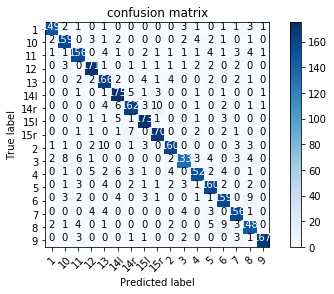

Normalized confusion matrix
[[0.91 0.01 0.01 0.   0.01 0.   0.   0.   0.   0.   0.02 0.01 0.   0.01
  0.01 0.02 0.01]
 [0.01 0.9  0.   0.02 0.01 0.01 0.   0.   0.   0.   0.01 0.02 0.01 0.01
  0.   0.01 0.  ]
 [0.01 0.01 0.86 0.   0.02 0.01 0.   0.01 0.01 0.01 0.01 0.01 0.02 0.01
  0.02 0.02 0.01]
 [0.   0.02 0.   0.92 0.01 0.   0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.
  0.01 0.   0.  ]
 [0.   0.   0.01 0.01 0.89 0.01 0.   0.02 0.01 0.02 0.   0.   0.01 0.
  0.01 0.01 0.  ]
 [0.   0.   0.01 0.   0.01 0.93 0.03 0.01 0.02 0.   0.   0.01 0.   0.01
  0.   0.   0.01]
 [0.   0.   0.   0.   0.02 0.03 0.85 0.02 0.05 0.   0.   0.01 0.   0.01
  0.   0.01 0.01]
 [0.   0.   0.   0.01 0.01 0.03 0.01 0.93 0.01 0.   0.   0.01 0.   0.02
  0.   0.   0.  ]
 [0.   0.   0.01 0.01 0.   0.01 0.04 0.   0.92 0.   0.   0.01 0.   0.01
  0.01 0.   0.  ]
 [0.01 0.01 0.   0.01 0.05 0.   0.01 0.02 0.   0.87 0.   0.   0.   0.
  0.02 0.02 0.  ]
 [0.01 0.05 0.04 0.01 0.   0.   0.   0.   0.   0.01 0.8  0.02 0.02 0.
  0.02 0

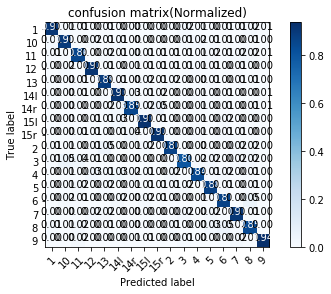

In [19]:
def get_predict(model,X):

    array_p=model.predict([X])
    predict=[np.argmax(i) for i in array_p]
    return  np.array(predict)

scores = model.evaluate([X_test], pd.get_dummies(y_test))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
prd = get_predict(model,X_test)
pr.confuse_matrix_plot(y_test,prd,encoder.classes_,title="confusion matrix")

In [20]:
from keras.models import model_from_json

In [23]:
# serialize model to JSON
model_json = model.to_json()
with open("model/model_pyther.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model/model_pyther.h5")
print("Saved model to disk")


Saved model to disk
